In [24]:
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error


In [2]:
ds=pd.read_csv('/Users/yashagarwal/Darsh/hackathon/OPEN Hack/repo_sync_YouCal/inputs.csv')

In [3]:
ds

,Unnamed: 0,Sex,Age,Height,Weight,Activity,Expected Calories
0,0,1,18,199,79,3,2450
1,1,1,18,199,93,3,2650
2,2,1,18,199,107,3,2850
3,3,0,20,140,39,3,1700
4,4,0,20,140,46,3,1800
...,...,...,...,...,...,...,...
241,241,1,96,154,56,4,1700
242,242,1,96,154,64,4,1850
243,243,0,97,186,69,3,1850
244,244,0,97,186,81,3,2100


In [4]:
ds.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
ds

,Sex,Age,Height,Weight,Activity,Expected Calories
0,1,18,199,79,3,2450
1,1,18,199,93,3,2650
2,1,18,199,107,3,2850
3,0,20,140,39,3,1700
4,0,20,140,46,3,1800
...,...,...,...,...,...,...
241,1,96,154,56,4,1700
242,1,96,154,64,4,1850
243,0,97,186,69,3,1850
244,0,97,186,81,3,2100


In [6]:
print(ds)

     Sex  Age  Height  Weight  Activity  Expected Calories
0      1   18     199      79         3               2450
1      1   18     199      93         3               2650
2      1   18     199     107         3               2850
3      0   20     140      39         3               1700
4      0   20     140      46         3               1800
..   ...  ...     ...     ...       ...                ...
241    1   96     154      56         4               1700
242    1   96     154      64         4               1850
243    0   97     186      69         3               1850
244    0   97     186      81         3               2100
245    0   97     186      93         3               2350

[246 rows x 6 columns]


In [7]:
dsm=ds[ds["Sex"]==0]
len(dsm)


123

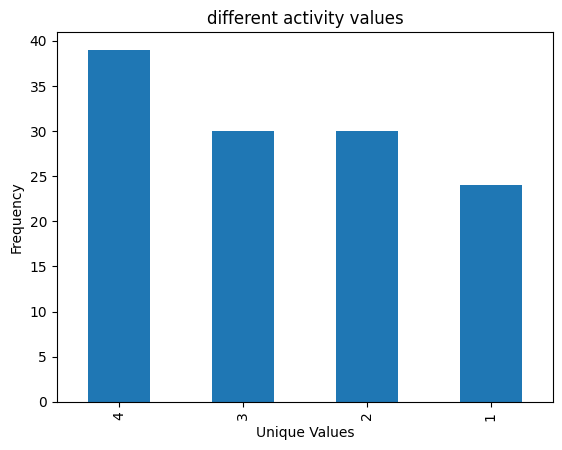

In [8]:
dsm["Activity"].value_counts().plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('different activity values')
plt.show()

In [9]:
dsf=ds[ds["Sex"]==1]
len(dsf)

123

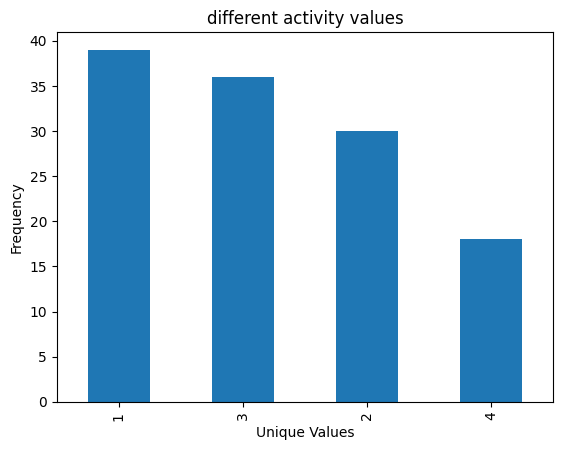

In [10]:
dsf["Activity"].value_counts().plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('different activity values')
plt.show()

In [15]:
y=ds["Expected Calories"].to_numpy()
y
X = ds.drop(['Expected Calories'], axis=1).to_numpy()


In [20]:
def linear_function(x,*coeff):
    condition1 = (x[:, 0] == 0)  # Check if first column is zero for each row
    condition2 = (x[:, 4] == 1)  # Check if fifth column is one for each row
    condition3 = (x[:, 4] == 2)  # Check if fifth column is two for each row
    condition4 = (x[:, 4] == 3)  # Check if fifth column is three for each row
    condition5 = (x[:, 4] == 4)  # Check if fifth column is four for each row
    
    result = np.zeros(len(x))  # Initialize result array
    
    # Update result based on conditions
    result[condition1 & condition2] = (-x[condition1 & condition2, 1]*coeff[0] + x[condition1 & condition2, 2]*coeff[1] + x[condition1 & condition2, 3]*coeff[2] + coeff[3]) * coeff[8]
    result[condition1 & condition3] = (-x[condition1 & condition3, 1]*coeff[0] + x[condition1 & condition3, 2]*coeff[1] + x[condition1 & condition3, 3]*coeff[2] + coeff[3]) * coeff[9]
    result[condition1 & condition4] = (-x[condition1 & condition4, 1]*coeff[0] + x[condition1 & condition4, 2]*coeff[1] + x[condition1 & condition4, 3]*coeff[2] + coeff[2]) * coeff[10]
    result[~condition1 & condition2] = (-x[~condition1 & condition2, 1]*coeff[4] + x[~condition1 & condition2, 2]*coeff[5] + x[~condition1 & condition2, 3]*coeff[6] + coeff[7]) * coeff[8]
    result[~condition1 & condition3] = (-x[~condition1 & condition3, 1]*coeff[4] + x[~condition1 & condition3, 2]*coeff[5] + x[~condition1 & condition3, 3]*coeff[6] + coeff[7]) * coeff[9]
    result[~condition1 & condition4] = (-x[~condition1 & condition4, 1]*coeff[4] + x[~condition1 & condition4, 2]*coeff[5] + x[~condition1 & condition4, 3]*coeff[6] + coeff[7]) * coeff[10]
    result[condition1 & condition5] = (-x[condition1 & condition5, 1]*coeff[0] + x[condition1 & condition5, 2]*coeff[1] + x[condition1 & condition5, 3]*coeff[2] + coeff[3]) * coeff[11]
    return result

In [17]:
coeff=[6.75,5.003,13.75,66.5,4.676,1.850,9.563,665.1,1.2,1.375,1.55,1.725]

In [21]:
coeff_fit, _ = curve_fit(linear_function, X, y, p0=coeff)


In [23]:
coeff_fit

array([  7.40300629,   5.91606591,  14.91743453,  23.44801225,
         5.1473278 ,   2.00398124,  10.70217296, 719.47050621,
         1.08497681,   1.19603515,   1.30695392,   1.51996267])

In [25]:
y_pred = linear_function(X, *coeff_fit)

# Calculate the Mean Squared Error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 341951.9745097536
